## Demo asigment task 2

Answers: https://mlcourse.ai/book/topic02/assignment02_analyzing_cardiovascular_desease_data_solution.html

In [1]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import plotly.express as px


In [2]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.age.min()/365

29.583561643835615

Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

**We can assume that 2 gender is man**

<AxesSubplot:xlabel='gender', ylabel='height'>

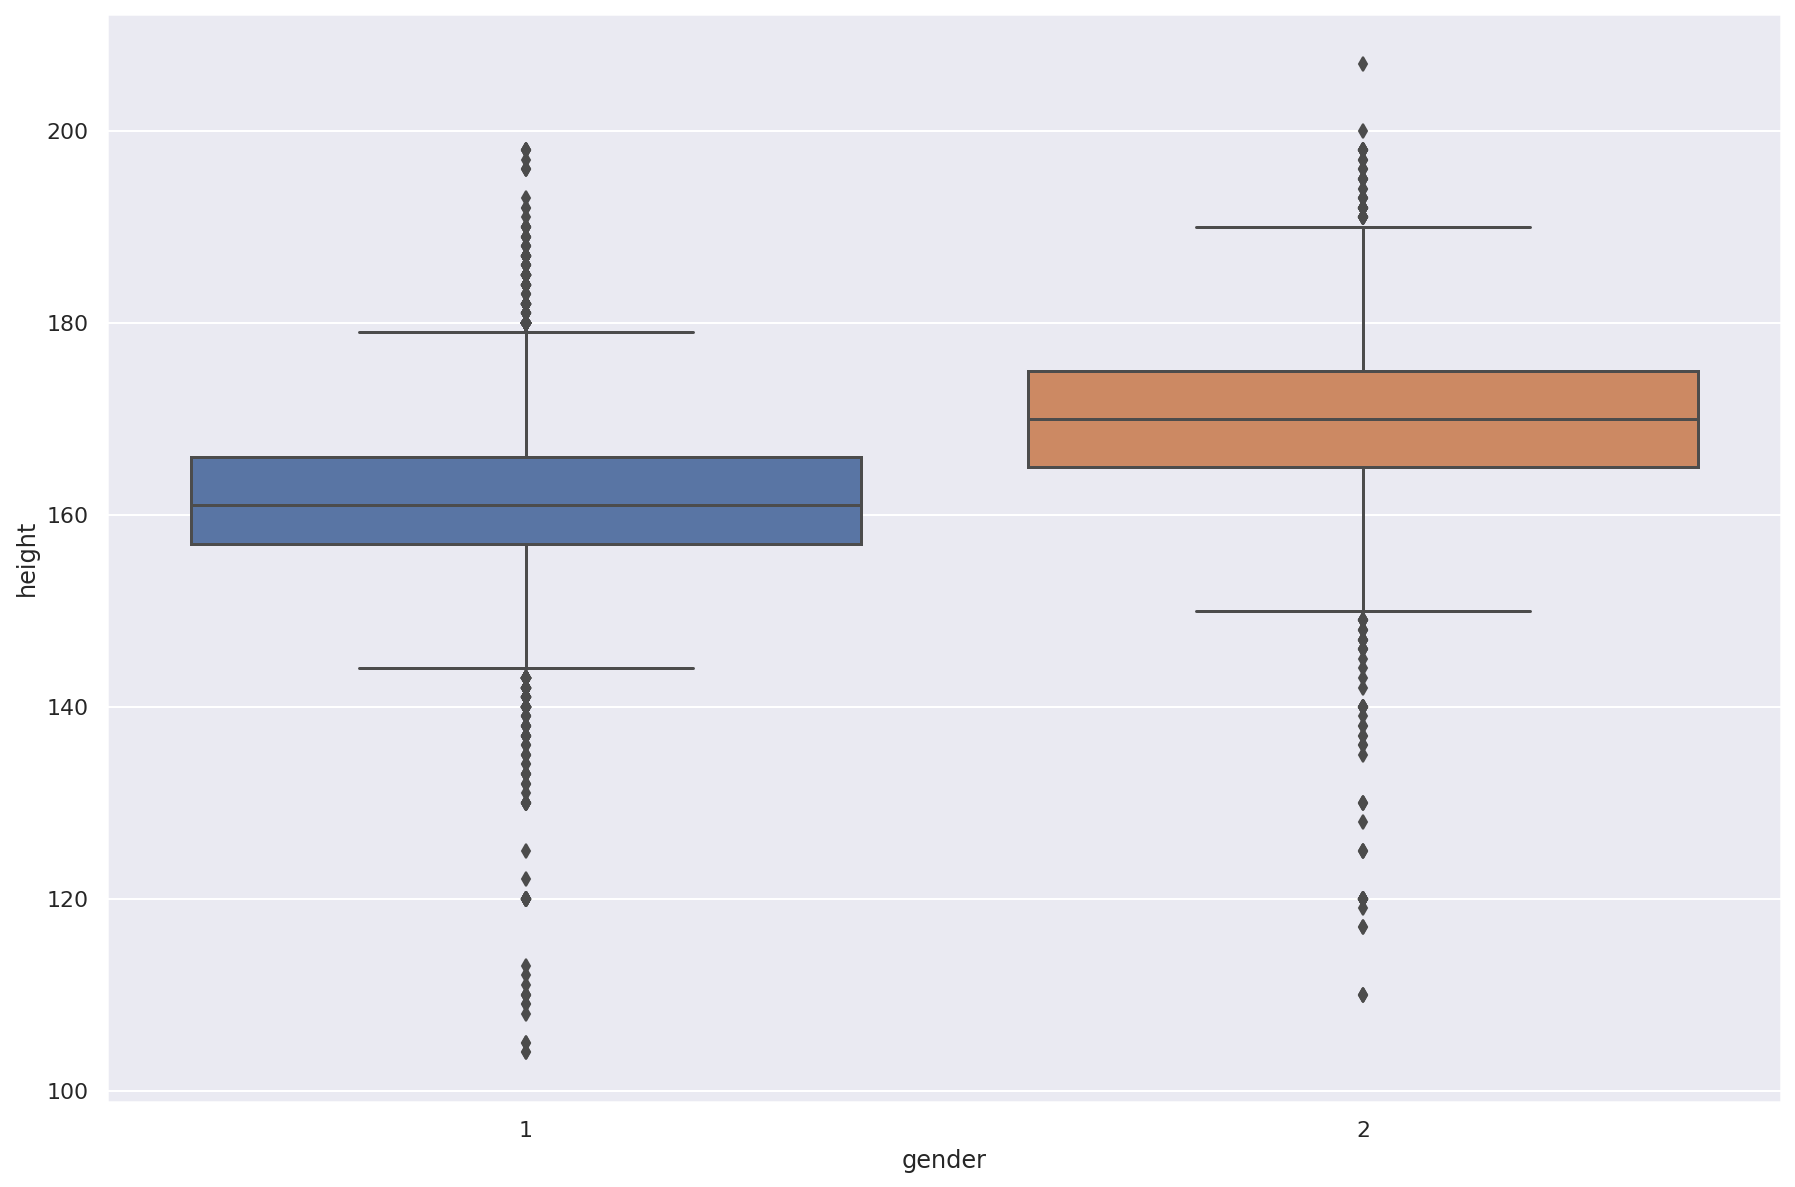

In [3]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(
     y = "height"
    ,x = "gender"
    ,data = df[(df["height"]>100)&(df["height"]<220)]
    ,)

Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women? **Men**

In [5]:
df.groupby(by ="gender")['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)? 20

In [12]:
(df.groupby(by ="gender")['smoke'].mean()[2]-df.groupby(by ="gender")['smoke'].mean()[1])*100

20.102390309976737

What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You’ll need to figure out the units of feature age in this dataset.

In [23]:
round(((df.groupby(by  = 'smoke')['age'].median()[0] -df.groupby(by  = 'smoke')['age'].median()[1])/30.4167))

20

Let’s take a look at the upper-right rectangle showing a subset of smoking men aged from 60 to 65. (It’s not obvious, but the values in figure represent the upper boundary).

We see a value 9 in the lower-left corner of the rectangle and 47 in the upper-right. This means that for people in this gender-age group whose systolic pressure is less than 120 the risk of a CVD is estimated to be 5 times lower than for those with the pressure in the interval [160,180).

Let’s calculate the same ratio, but with our data.

Clarifications:

Calculate age_years feature – rounded age in years. For this task, select people aged from 60 to 64 inclusive.

Cholesterol level categories in the figure and in our data are different. In the figure, the values of cholesterol feature are as follows: 4 mmol/l  1, 5-7 mmol/l  2, 8 mmol/l  3.


Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?



In [48]:
df['years'] = round(df['age']/365.25)
old = df[(df.years <= 64)&(df.years >= 60)&(df.smoke ==1)]

old[(old.ap_hi>=160)&(old.cholesterol==3)&(old.ap_hi<180)]['cardio'].mean()/\
old[(old.ap_hi<=120)&(old.cholesterol==1)]['cardio'].mean()

2.598059598059598

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25

Question 1.6. (2 points). Choose the correct statements:

Median BMI in the sample is within the range of normal BMI values. 

The BMI for women is on average higher than for men.**True**

Healthy people have, on average, a higher BMI than the people with CVD.

For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women. **True**

In [53]:
df['BMI'] = df.weight*10000/(df.height*df.height)

In [67]:

print(df['BMI'].median(),'\n')
print(df.groupby(by = 'gender')['BMI'].median(),'\n')
print(df.groupby(by = 'cardio')['BMI'].median(),'\n')
print(df.pivot_table(columns = ['cardio','alco'],index = 'gender',values = 'BMI',aggfunc = 'median'))

26.374068120774975 

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64 

cardio
0    25.476660
1    27.471384
Name: BMI, dtype: float64 

cardio          0                     1           
alco            0          1          0          1
gender                                            
1       25.654372  27.885187  27.885187  30.110991
2       25.102391  25.351541  26.674874  27.530797


We can see that the data is not perfect. It contains “dirt” and inaccuracies. We’ll see this better as we visualize the data.

Filter out the following patient segments (we consider these as erroneous data)

diastolic pressure is higher than systolic

height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)

height is strictly more than 97.5 percentile

weight is strictly less than 2.5 percentile

weight is strictly more than 97.5 percentile

This is not everything that we can do to clean this data, but this is sufficient for now.

In [75]:
clean_df = df[
    (df.ap_hi>df.ap_lo)
    &(df.height >= df.height.quantile(0.025))
    &(df.height <= df.height.quantile(0.975))
    &(df.weight >= df.weight.quantile(0.025))
    &(df.weight <= df.weight.quantile(0.975))
]

In [77]:
100*(1-clean_df['id'].count()/df['id'].count())

9.631428571428568

## Part 2. Visual data analysis 

Plot a correlation matrix using heatmap(). You can create the matrix using the standard pandas tools with the default parameters

**Question 2.1. (1 point).** Which pair of features has the strongest Pearson’s correlation with the gender feature?

Cardio, Cholesterol 0.22

Height, Smoke 0.19

*Smoke, Alco 0.34*

Height, Weight 0.29



<AxesSubplot:>

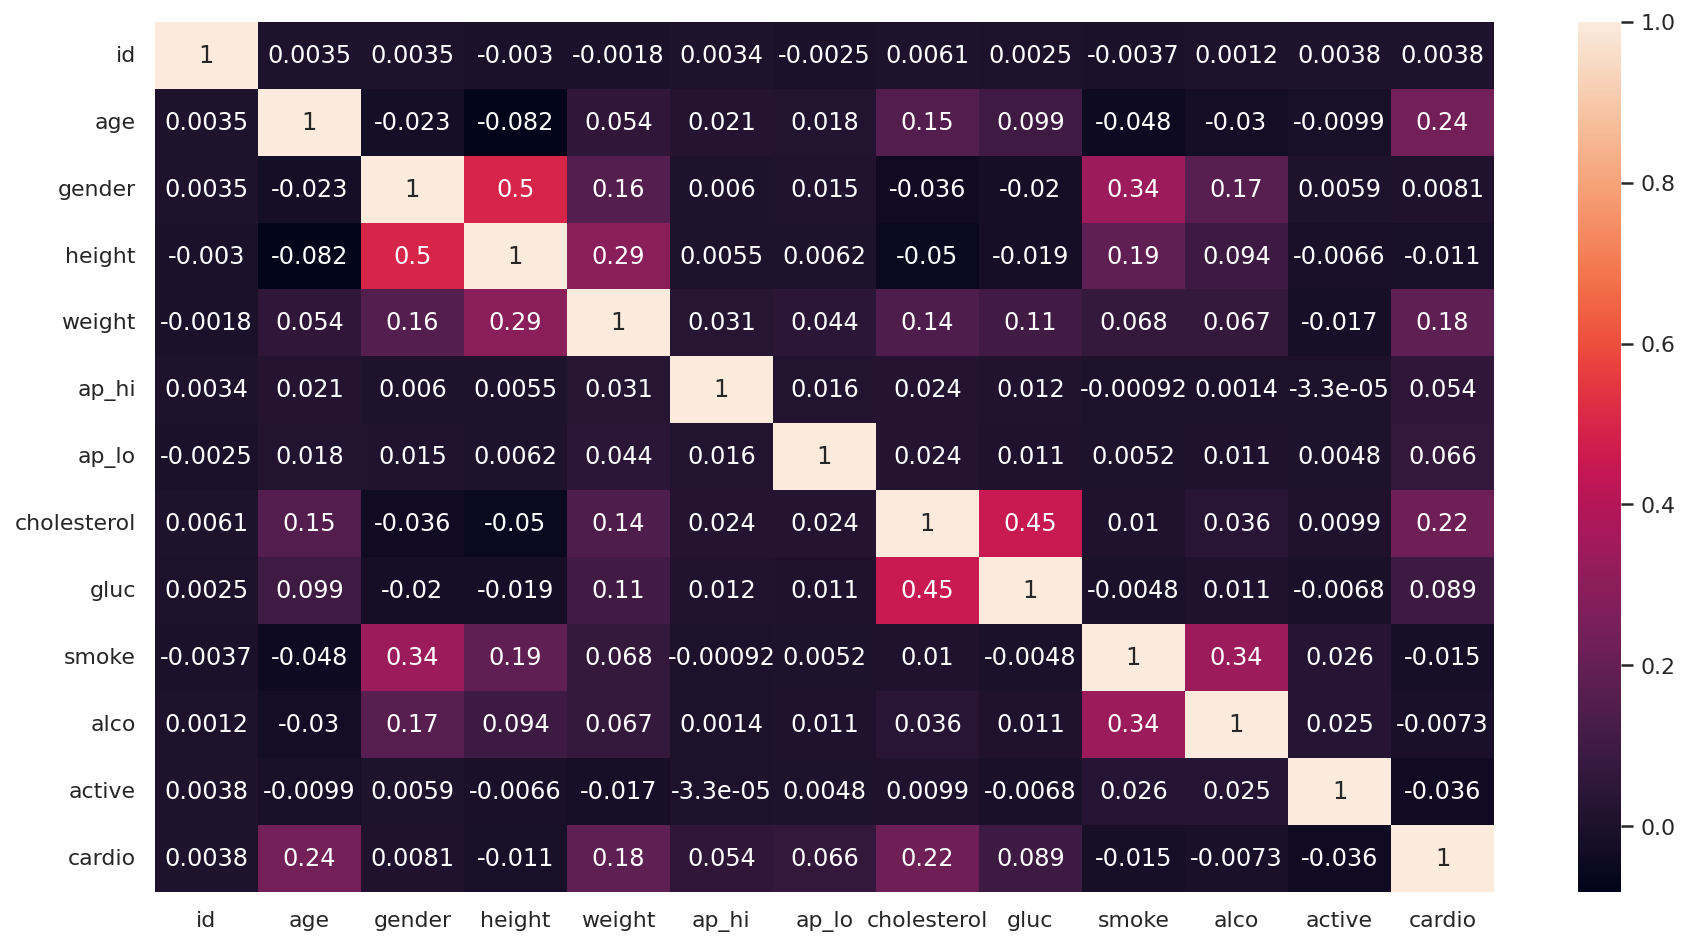

In [10]:
corr = df.corr(method = "pearson")
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr,annot = True)

Task:
### Create a violin plot for the height and gender using violinplot(). Use the parameters:

hue to split by gender;

scale to evaluate the number of records for each gender.

In order for the plot to render correctly, you need to convert your DataFrame to long format using the melt() function from pandas. Here is an example of this for your reference.

<AxesSubplot:xlabel='variable', ylabel='value'>

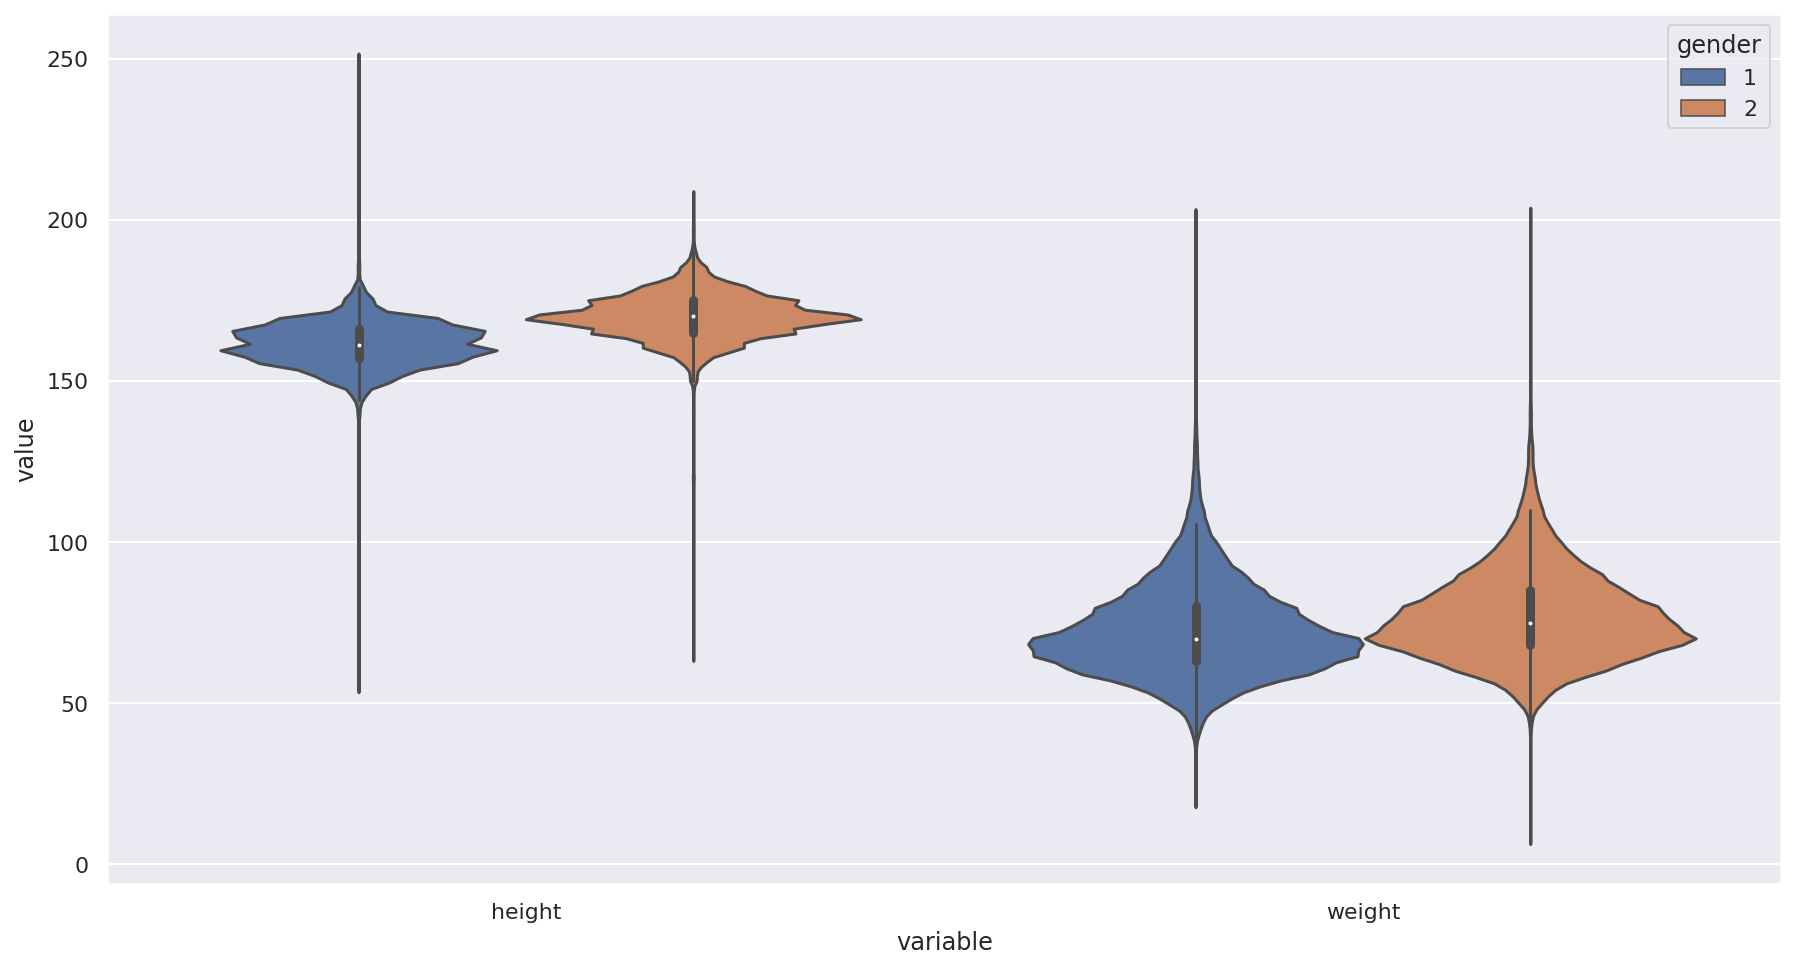

In [21]:
biba = pd.melt(df, value_vars=['height', 'weight'], id_vars='gender')

biba.head()
sns.violinplot(data = biba,x = 'variable',y='value',hue = 'gender')

**Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?**

Height, Weight 0.31

Age, Weight 0.062

Cholesterol, Gluc 0.41

Cardio, Cholesterol 0.22

Ap_hi, Ap_lo 0.74

Smoke, Alco 0.34

In most cases, the Pearson coefficient of linear correlation is more than enough to discover patterns in data. But let’s go a little further and calculate a rank correlation. It will help us to identify such feature pairs in which the lower rank in the variational series of one feature always precedes the higher rank in the another one (and we have the opposite in the case of negative correlation).

Task:
Calculate and plot a correlation matrix using the Spearman’s rank correlation coefficient.

<AxesSubplot:>

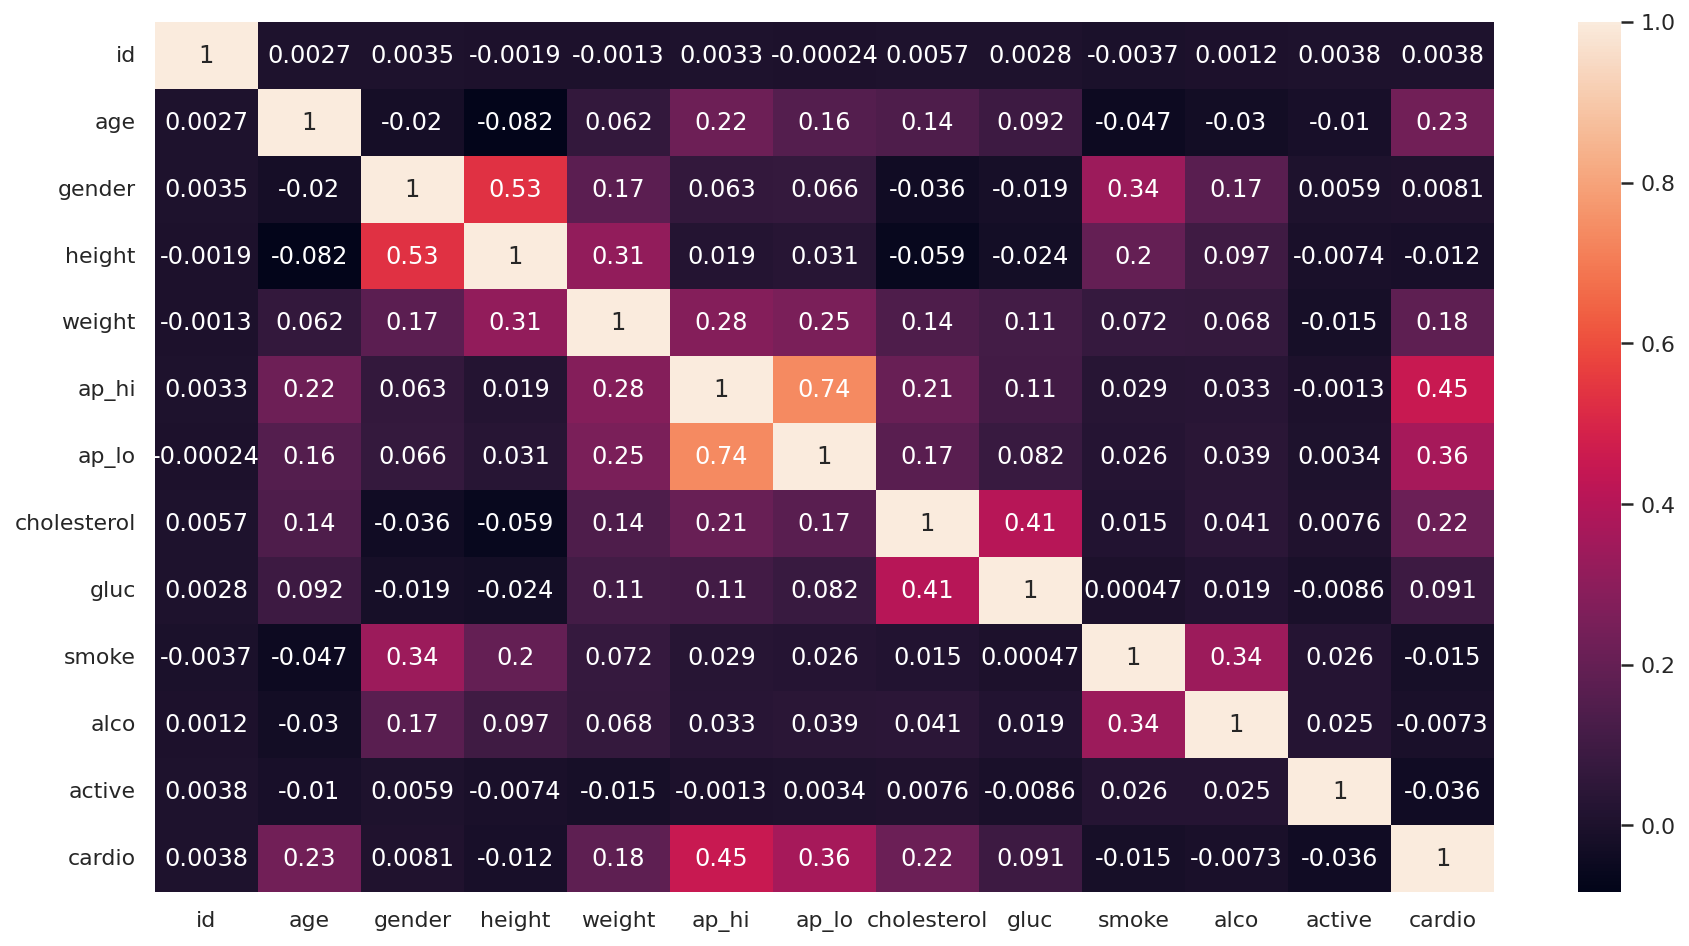

In [22]:
corr = df.corr(method = "spearman")
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr,annot = True)

**Question 2.3. (1 point). Why do these features have strong rank correlation?**

Inaccuracies in the data (data acquisition errors).

Relation is wrong, these features should not be related.

*Nature of the data.*


Previously, we calculated the age of the respondents in years at the moment of examination.

## Task:
Create a count plot using countplot() with the age on the X axis and the number of people on the Y axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each cardio class of that age.

Question 2.4. (1 point). At what age does the number of people with CVD outnumber the number of people without CVD for the first time?

44

**55**

64

70

<AxesSubplot:xlabel='years', ylabel='count'>

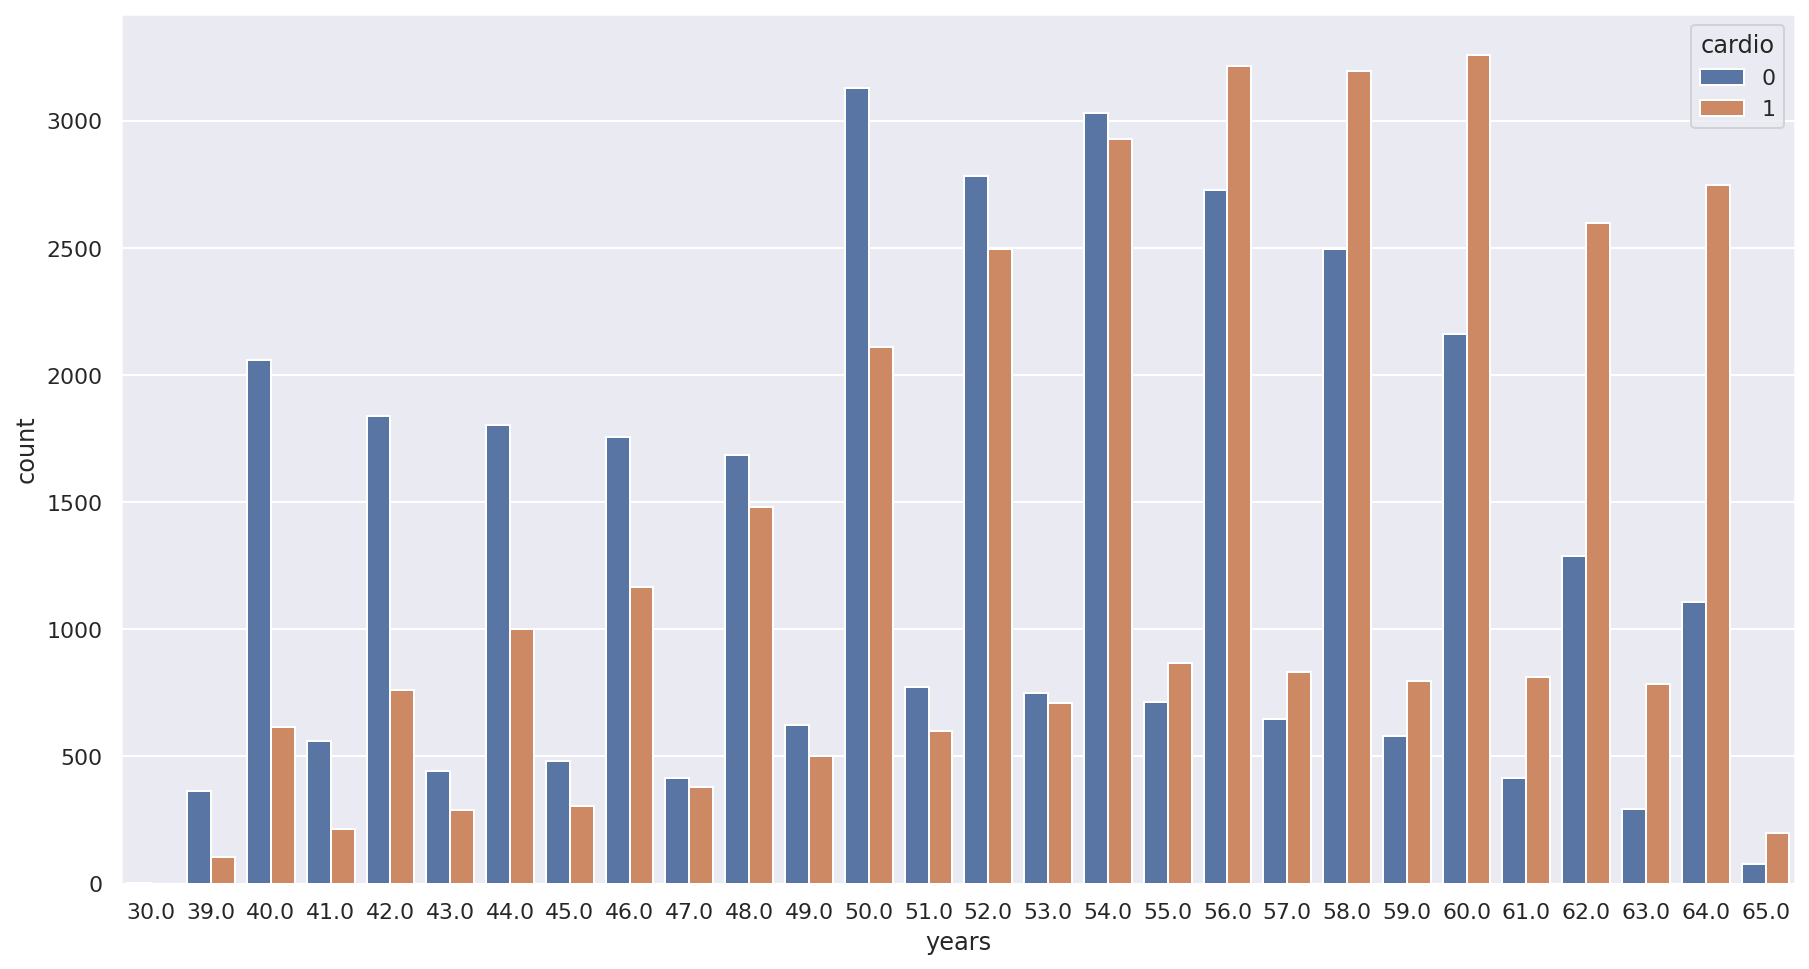

In [38]:
import math
df2=df.copy()
df2['years'] = df2['age'].apply(lambda x: int(x))/365.25 
df2['years'] = round(df2['years'])
sns.countplot(x = 'years',hue = 'cardio',data = df2)